In [2]:
import uproot
file = uproot.open("uproot-tutorial-file.root")
file.classnames()

{'Events;1': 'TTree'}

In [3]:
tree = file["Events"]
print(tree)
tree.keys()

<TTree 'Events' (6 branches) at 0x01b0922714f0>


['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [4]:
tree.arrays()

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='100000 * {nMuon: uint32...'>

In [5]:
branches = tree.arrays()
input_list = branches["nMuon"]
print(len(branches))

for i in range(0, len(branches)):
    if i < 10:
        print(i)
        print("nMuon = ", branches["nMuon"][i], len(branches["Muon_pt"][i]))

    for j in range(0, branches["nMuon"][i]):
        if i < 10:
            print(branches["Muon_pt"][i][j])

100000
0
nMuon =  2 2
10.763697
15.736523
1
nMuon =  2 2
10.53849
16.327097
2
nMuon =  1 1
3.2753265
3
nMuon =  4 4
11.429154
17.634033
9.624728
3.5022252
4
nMuon =  4 4
3.2834418
3.6440058
32.911224
23.721754
5
nMuon =  3 3
3.566528
4.572504
4.371863
6
nMuon =  2 2
57.6067
53.04508
7
nMuon =  2 2
11.319675
23.906353
8
nMuon =  2 2
10.193569
14.204061
9
nMuon =  2 2
11.470704
3.4690065


In [6]:
pt_mask = branches["Muon_pt"] > 15
eta_mask = abs(branches["Muon_eta"]) < 2.4
# print(pt_mask)
# print(eta_mask)
mask = pt_mask & eta_mask
print(mask)

nMuon_masked = [sum(1 if value else 0 for value in boolean) for boolean in mask]
print(nMuon_masked)
len(nMuon_masked)

[[False, True], [False, True], ..., [False, True], [False, False, False]]
[1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 4, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 3, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1

100000

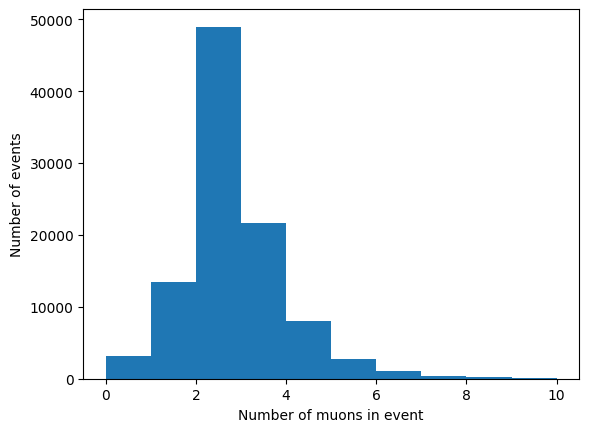

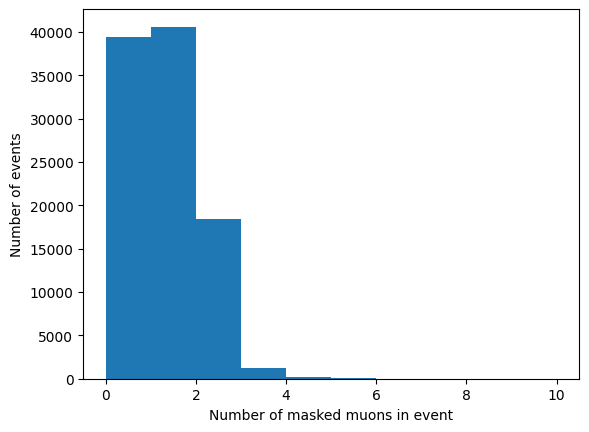

In [7]:
import matplotlib.pyplot as plt

plt.hist(branches["nMuon"], bins = 10, range = (0, 10))
plt.xlabel("Number of muons in event")
plt.ylabel("Number of events")
plt.show()

plt.hist(nMuon_masked, bins = 10, range = (0, 10))
plt.xlabel("Number of masked muons in event")
plt.ylabel("Number of events")
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_12152\2347662444.py:4: SyntaxWarning: invalid escape sequence '\m'
  label = ["-", "$p_{\mathrm{T}}$ > 15, $|\eta| < 2.4$"], bins = 10, range = (0, 10))


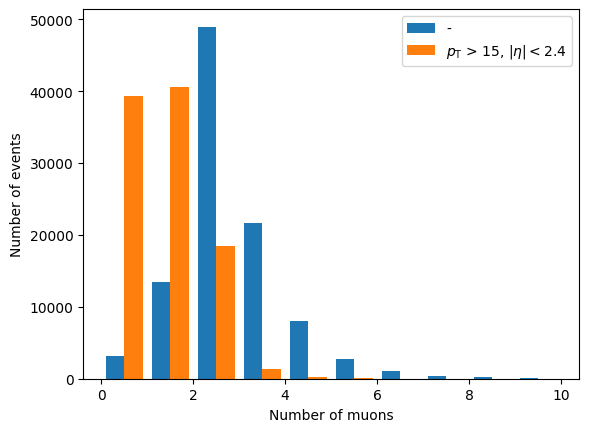

In [15]:
import matplotlib.pyplot as plt

plt.hist([branches["nMuon"], nMuon_masked], \
          label = ["-", "$p_{\mathrm{T}}$ > 15, $|\eta| < 2.4$"], bins = 10, range = (0, 10))
plt.xlabel("Number of muons")
plt.ylabel("Number of events")
plt.legend()
plt.show()

In [9]:
double_muon_mask = branches["nMuon"] > 1
print(double_muon_mask)
print(branches["nMuon"][double_muon_mask])

import numpy as np
np.sum(branches["nMuon"][double_muon_mask])

[True, True, False, True, True, True, ..., False, True, True, True, True, True]
[2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 2, 6, 3, ..., 5, 2, 6, 5, 2, 3, 2, 3, 2, 3, 2, 3]


221839

In [10]:
momentum = ["Muon_mass", "Muon_eta", "Muon_phi", "Muon_pt"]

for i in momentum:
    for j in range(0, 2):
        print(f"{i}{j + 1} = ", [sublist[j] for sublist in branches[i][double_muon_mask]])

Muon_mass1 =  [0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0.10565837, 0

Invariant Mass

In [11]:
from pylorentz import Momentum4

Muon1_mass = np.array([sublist[0] for sublist in branches["Muon_mass"][double_muon_mask]])
Muon1_eta = np.array([sublist[0] for sublist in branches["Muon_eta"][double_muon_mask]])
Muon1_phi = np.array([sublist[0] for sublist in branches["Muon_phi"][double_muon_mask]])
Muon1_pt = np.array([sublist[0] for sublist in branches["Muon_pt"][double_muon_mask]])

Muon2_mass = np.array([sublist[1] for sublist in branches["Muon_mass"][double_muon_mask]])
Muon2_eta = np.array([sublist[1] for sublist in branches["Muon_eta"][double_muon_mask]])
Muon2_phi = np.array([sublist[1] for sublist in branches["Muon_phi"][double_muon_mask]])
Muon2_pt = np.array([sublist[1] for sublist in branches["Muon_pt"][double_muon_mask]])

Muon1 = Momentum4.m_eta_phi_pt(Muon1_mass, Muon1_eta, Muon1_phi, Muon1_pt)
Muon2 = Momentum4.m_eta_phi_pt(Muon2_mass, Muon2_eta, Muon2_phi, Muon2_pt)

M = Muon1 + Muon2
print(M.m)
len(M.m)

[34.4154653  27.91548982 26.18330354 ... 13.80684327 16.5050751
 19.21637542]


83343

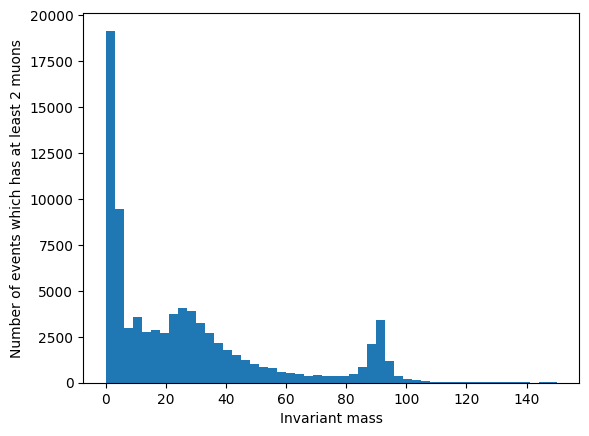

In [12]:
# print(max(M.m))
plt.hist(M.m, bins = 50, range = (0, 150))
plt.xlabel("Invariant mass")
plt.ylabel("Number of events which has at least 2 muons")
plt.show()

Transverse Momentum

Text(0, 0.5, 'Number of events which has at least 2 muons')

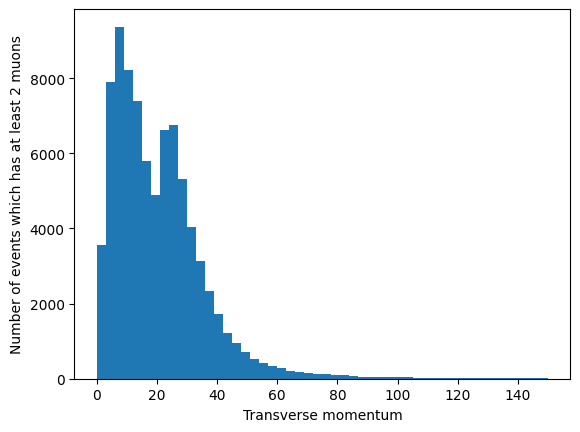

In [13]:
plt.hist(M.p_t, bins = 50, range = (0, 150))
plt.xlabel("Transverse momentum")
plt.ylabel("Number of events which has at least 2 muons")

In [14]:
from pylorentz import Momentum4
muon = Momentum4.m_eta_phi_pt(0.1057, 4.5, 1.5, 35)
print(muon.m)
print(muon.p_t)
print(muon.e)
print(muon.p)
print(muon.phi)
print(muon.eta)

0.10570000091977241
35.0
1575.4942087442607
1575.494205198551
1.5
4.5
